# Sentiment Review of a Restaurant


Restaurants have the opportunity to attract a growing number of clients thanks to their online presence. Restaurants today want to know what customers think of their cuisine and service. They find it useful to know what patrons think about their eatery. Restaurants are able to examine data and quantify client feedback. Sentiment analysis can be used to accurately quantify this information.

People typically listen to advice from acquaintances, friends, and relatives. However, one of the most significant platforms for getting counsel in the twenty-first century has been the internet. These online platforms allow customers to comment on their experiences with restaurant service, food, taste, ambiance, and pricing as well as view the comments of others. Because they are based on word-of-mouth advertising, these reviews assist customers in picking the restaurant and developing a sense of confidence.

I will use text classification to analyse the text data and perform sentiment analysis.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import and look at the restaurant reviews data
dataset = pd.read_csv('Restaurant_Reviews.tsv' , delimiter='\t')

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#checking for missing value
dataset.isna().sum()

Review    0
Liked     0
dtype: int64

In [5]:
dataset.shape

(1000, 2)

<AxesSubplot:xlabel='Liked', ylabel='count'>

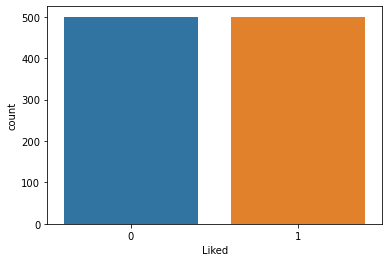

In [23]:
sns.countplot(x = dataset['Liked'])

##### Observation:
Review and Liked are the two columns of this dataset. Review is the restaurant review, and Liked is a rating between 0 and 1. 1 indicates that the customer enjoyed the restaurant, whereas 0 indicated displeasure.

#### Create a word cloud.
The wordcloud is a visual representation of the dataset's most popular keywords. The font size of words in a wordcloud is directly proportional to the frequency of the word. We must first use the pip command to install the wordcloud module before we can generate a wordcloud.

In [8]:
!pip install wordcloud 


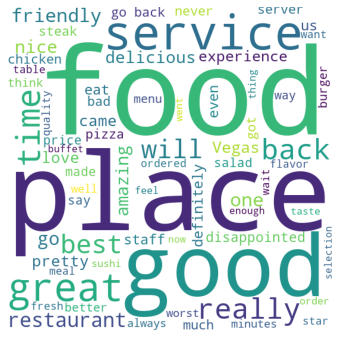

In [10]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text):

    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # show plot
    plt.show()
    
paragraph=' '.join(dataset.Review.tolist())
word_cloud(paragraph)

##### Observation:

The most often used words in the word cloud above are food, place, good, great, service, time, and restaurant.

### Word cloud for positive restaurant reviews

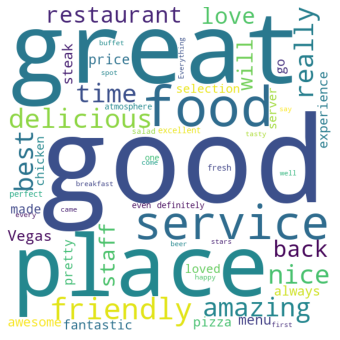

In [11]:
paragraph=' '.join(dataset[dataset.Liked==1].Review.tolist())
word_cloud(paragraph)

##### Observbation:

The most frequent words for positive reviews are good, great, service, place, friendly, delicious, nice, and amazing.

### Word cloud for negative restaurant reviews

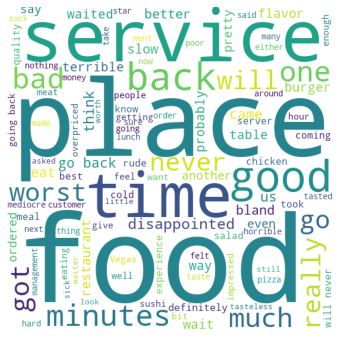

In [13]:
paragraph=' '.join(dataset[dataset.Liked==0].Review.tolist())
word_cloud(paragraph)

##### Observation
we can see from the above word cloud that the most frequent negative review words are food, place, time, food service, bad, worst, slow, minutes, and disappointed.

#### Vectorization

Potential features are extracted and translated to numerical format from the cleaned dataset. For the purpose of converting textual data to numerical format, vectorization techniques are used. Through the use of vectorization, a matrix is produced in which each column corresponds to a feature and each row to a specific review.

In [14]:
# Bag of word: vectors word frequency(count)
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from data like symbols

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(dataset['Review'])

print(text_counts.shape)

(1000, 1834)


#### CountVectorized vector is converted to Pandas DataFrame

In [18]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names_out())
count_df.head()

,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split train and test set

To assess the model performance, we need to split the dataset into a training set and a test set.

The dataset is split using function train_test_split(). 3 parameters are passsed features , target, and test_set size. Additionally,random_state is used to select records randomly. Here, random_state simply sets seed to the random generator, so that the train-test splits are always deterministic. If not, it is different each time.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    dataset['Liked'], 
                                                    test_size=0.3, 
                                                    random_state=1)

### Model Building and Evaluation
The Text Classification Model is built using the Multinomial Naive Bayes Classifier.

The MultinomialNB module is imported and a Multinomial Naive Bayes classifier object using MultinomialNB() function is created.

Then, the model is fit on the train set using fit() and prediction is performed on the test set using predict().

In [20]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7333333333333333


##### Observation:
The classification rate is 73.34%, which is a good accuracy. 

### Predict Sentiment

The trained model may be used to create predictions using the predict() method, but first we must use the transform() method to turn the input text into a vector.

In [21]:
# Transform into matrix
val=cv.transform(["Service of the restaurant is very slow but food was delicous"])

# make prediction
clf.predict(val)

array([0], dtype=int64)

In [22]:
# Transform into matrix
val=cv.transform(['The food was delicious'])

# make prediction
clf.predict(val)

array([1], dtype=int64)

In [ ]:
#Thank you